In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

## Уровень доверия

In [2]:
def get_normal_samples(n):
    k = 50
    norm_rv = sps.norm(loc=10, scale=2)
    samples = []
    for i in range(k):
        samples.append(norm_rv.rvs(size=n))
    
    return np.array(samples)

In [3]:
def get_means(samples):
    means = []
    for i in range(len(samples)):
        means.append(samples[i].mean())
    
    return np.array(means)

In [4]:
def get_borders(means, p):
    norm_rv = sps.norm(0, 1)
    fp = norm_rv.ppf(p)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - fp*(2/np.sqrt(10)))
        right.append(means[i] + fp*(2/np.sqrt(10)))

    return np.array(left), np.array(right)

In [5]:
def print_quantile(func, ps):
    quantiles = list(map(lambda x: np.round(x, 3), func.ppf(ps)))
    df = pd.DataFrame()
    df['Pд'] = ps
    df['Значение квантили fp'] = quantiles
    return df

In [6]:
print_quantile(sps.norm(0, 1), [0.9, 0.99, 0.999])

,Pд,Значение квантили fp
0,0.900,1.282
1,0.990,2.326
2,0.999,3.090


In [7]:
samples = get_normal_samples(10)
means = get_means(samples)
df = pd.DataFrame(samples)
df['mean'] = means

left, right = get_borders(means, 0.9)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,13.457600,7.597327,9.546854,13.850303,12.685016,9.309519,10.425236,10.156152,9.426299,8.941169,10.539547,9.729023,11.350072
1,9.939341,8.251598,13.852877,12.097824,13.540896,9.790663,6.885655,10.461357,10.458113,11.847274,10.712560,9.902036,11.523084
2,9.420394,9.170387,9.595529,7.934731,11.322458,6.486327,10.906754,10.450196,4.669041,6.126693,8.608251,7.797727,9.418775
3,11.597741,9.752624,9.067215,7.753042,10.338000,12.358584,8.517455,12.200970,10.457457,10.100455,10.214354,9.403830,11.024879
4,11.347485,6.665018,9.980166,12.410450,10.800935,12.615910,8.330430,9.140474,12.824765,9.488965,10.360460,9.549935,11.170984


In [8]:
def draw_borders(left, right):
    x = np.linspace(1, 50, 50)
    plt.axis([0, 51, 5, 15])
    plt.plot(x, left, label='a1')
    plt.plot(x, right, label='a2')
    plt.scatter(x, left, s=15)
    plt.scatter(x, right, s=15)
    plt.xlabel('Номер испытания')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.legend()

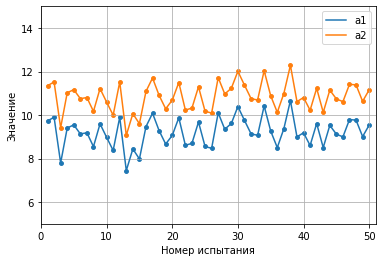

In [9]:
draw_borders(left, right)

In [10]:
left, right = get_borders(means, 0.99)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,13.457600,7.597327,9.546854,13.850303,12.685016,9.309519,10.425236,10.156152,9.426299,8.941169,10.539547,9.068236,12.010859
1,9.939341,8.251598,13.852877,12.097824,13.540896,9.790663,6.885655,10.461357,10.458113,11.847274,10.712560,9.241248,12.183872
2,9.420394,9.170387,9.595529,7.934731,11.322458,6.486327,10.906754,10.450196,4.669041,6.126693,8.608251,7.136939,10.079563
3,11.597741,9.752624,9.067215,7.753042,10.338000,12.358584,8.517455,12.200970,10.457457,10.100455,10.214354,8.743043,11.685666
4,11.347485,6.665018,9.980166,12.410450,10.800935,12.615910,8.330430,9.140474,12.824765,9.488965,10.360460,8.889148,11.831771


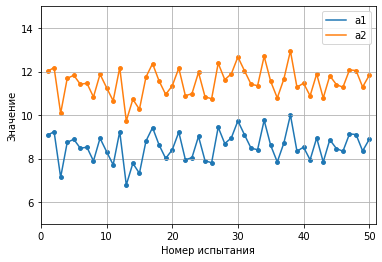

In [11]:
draw_borders(left, right)

In [12]:
left, right = get_borders(means, 0.999)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,13.457600,7.597327,9.546854,13.850303,12.685016,9.309519,10.425236,10.156152,9.426299,8.941169,10.539547,8.585113,12.493982
1,9.939341,8.251598,13.852877,12.097824,13.540896,9.790663,6.885655,10.461357,10.458113,11.847274,10.712560,8.758125,12.666994
2,9.420394,9.170387,9.595529,7.934731,11.322458,6.486327,10.906754,10.450196,4.669041,6.126693,8.608251,6.653816,10.562686
3,11.597741,9.752624,9.067215,7.753042,10.338000,12.358584,8.517455,12.200970,10.457457,10.100455,10.214354,8.259920,12.168789
4,11.347485,6.665018,9.980166,12.410450,10.800935,12.615910,8.330430,9.140474,12.824765,9.488965,10.360460,8.406025,12.314894


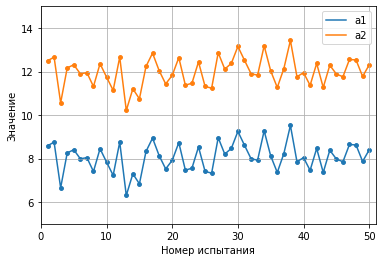

In [13]:
draw_borders(left, right)

### Для случая с неизвестной дисперсией

In [14]:
print_quantile(sps.t(df=9), [0.9, 0.99, 0.999])

,Pд,Значение квантили fp
0,0.900,1.383
1,0.990,2.821
2,0.999,4.297


In [15]:
def get_borders_unknown_disp(means, std, p):
    stud_rv = sps.t(df=9)
    tp = stud_rv.ppf(p)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - tp*(std[i]/np.sqrt(10)))
        right.append(means[i] + tp*(std[i]/np.sqrt(10)))

    return np.array(left), np.array(right)

In [16]:
samples = get_normal_samples(10)
means = get_means(samples)
std = list(map(lambda x : statistics.stdev(x), samples))
df = pd.DataFrame(samples)
df['mean'] = means

left, right = get_borders_unknown_disp(means, std, 0.9)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,5.597063,11.487850,11.932591,11.582681,12.143232,8.272239,5.299787,10.462744,10.657224,10.811975,9.824739,8.709627,10.939850
1,8.909370,11.875515,12.296113,11.731415,11.089854,10.334824,11.238608,7.603455,12.293726,14.274624,11.164750,10.346259,11.983242
2,8.404567,9.251790,8.645852,7.401908,12.298763,10.104191,10.223266,8.365071,12.457882,10.340447,9.749374,9.017021,10.481726
3,8.603786,9.141435,9.625816,6.031024,14.853442,7.662317,7.754812,7.984619,9.597952,8.073549,8.932875,7.910432,9.955318
4,9.033352,9.400364,11.731643,10.948902,9.207326,7.937983,7.506557,6.783735,11.576645,6.196023,9.032253,8.179379,9.885128


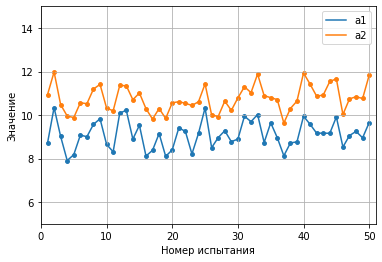

In [17]:
draw_borders(left, right)

In [18]:
left, right = get_borders_unknown_disp(means, std, 0.99)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,5.597063,11.487850,11.932591,11.582681,12.143232,8.272239,5.299787,10.462744,10.657224,10.811975,9.824739,7.549864,12.099613
1,8.909370,11.875515,12.296113,11.731415,11.089854,10.334824,11.238608,7.603455,12.293726,14.274624,11.164750,9.494993,12.834507
2,8.404567,9.251790,8.645852,7.401908,12.298763,10.104191,10.223266,8.365071,12.457882,10.340447,9.749374,8.255344,11.243404
3,8.603786,9.141435,9.625816,6.031024,14.853442,7.662317,7.754812,7.984619,9.597952,8.073549,8.932875,6.847047,11.018703
4,9.033352,9.400364,11.731643,10.948902,9.207326,7.937983,7.506557,6.783735,11.576645,6.196023,9.032253,7.292352,10.772154


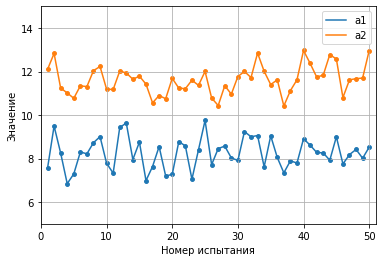

In [19]:
draw_borders(left, right)

## Интервалы для среднего и стандартного отклонения нормальной совокупности

In [20]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(20)
mean = sample.mean()

ps = [0.8, 0.9, 0.95, 0.98, 0.99, 0.995, 0.998, 0.999]
pss = list(map(lambda x: (1+x)/2, ps))
left, right = [], []
for p in pss:
    fp = sps.norm(0,1).ppf(p)
    left.append(mean - fp*(2/np.sqrt(20)))
    right.append(mean + fp*(2/np.sqrt(20)))
    
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
print('Интервалы для a:')
df

Интервалы для a:


,left,right
0.800,10.302001,11.448256
0.900,10.139528,11.610730
0.950,9.998606,11.751651
0.980,9.834754,11.915503
0.990,9.723183,12.027074
0.995,9.619785,12.130472
0.998,9.493135,12.257123
0.999,9.403560,12.346697


In [22]:
n = 10
left, right = [], []
std = statistics.stdev(sample)
for p in ps:
    tp = sps.t(df=9).ppf(p)
    chi2_rv = sps.chi2(df=19)
    t1 = chi2_rv.ppf((1+p)/2)
    t2 = chi2_rv.ppf((1-p)/2)
    left.append(std * np.sqrt((n-1) / t1))
    right.append(std * np.sqrt((n-1) / t2))
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
print('Интервалы для sigma:')
df

Интервалы для sigma:


,left,right
0.800,1.695992,2.591533
0.900,1.611164,2.781061
0.950,1.543312,2.964031
0.980,1.470406,3.201819
0.990,1.424108,3.381291
0.995,1.383422,3.561943
0.998,1.336286,3.804222
0.999,1.304622,3.991099


In [23]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(size=20)
stud_rv = sps.t(df=19)
chi2_rv = sps.chi2(df=19)
Pd = 0.95
print(stud_rv.ppf(Pd))
print(chi2_rv.ppf(1-Pd))
print('Верхняя граница для a: ', np.round(sample.mean() + stud_rv.ppf(Pd) * statistics.stdev(sample) / np.sqrt(20), 2))
print('Верхняя граница для a: ', np.round(statistics.stdev(sample) * np.sqrt((n-1) / chi2_rv.ppf(1-Pd)), 2))

1.729132811521367
10.117013063859051
Верхняя граница для a:  11.46
Верхняя граница для a:  1.66


## Задача

n=20, Pд=0.99, a=300

In [47]:
N = 10000
a = 300
n = 20

uni_rv = sps.uniform(loc=a)
sample = uni_rv.rvs(n)
sample

array([300.51182003, 300.3683829 , 300.88814823, 300.87328589,
       300.44949435, 300.06284442, 300.44495836, 300.82772958,
       300.85581477, 300.24040294, 300.83343882, 300.699227  ,
       300.61263959, 300.47861042, 300.29213862, 300.69820188,
       300.33875707, 300.22943778, 300.25792855, 300.72601214])

In [51]:
Pd = 0.99
mean = sample.mean()
chi2_rv = sps.chi2(df=2*n)
t1, t2 = chi2_rv.ppf((1-Pd)/2), chi2_rv.ppf((1+Pd)/2)
print('t1 =', np.round(t1, 2), 't2 =', np.round(t2, 2))
a1, a2 = 2*n*mean / t2, 2*n*mean / t1
print('Доверительный интервал для a ({:.2f}, {:.2f})'.format(a1, a2))

m1, m2 = N*(1 - np.exp(-50/a2)), N*(1 - np.exp(-50/a1))
print('Доверительный интервал для M ({:.2f}, {:.2f})'.format(m1, m2))

t1 = 20.71 t2 = 66.77
Доверительный интервал для a (180.05, 580.56)
Доверительный интервал для M (825.19, 2424.74)
